### Cancer Risk Prediction Project

#### About the Project

The aim of this project is to create a predictive system that helps individuals assess their risk of lung cancer using machine learning techniques. By analyzing a set of attributes related to lung cancer risk, the system can provide a risk assessment, allowing individuals to make informed decisions about their health. This project utilizes a dataset from Kaggle, specifically designed for this purpose.

#### Dataset Overview

The dataset used in this project comes from the online lung cancer prediction system. It contains a total of 284 instances and 16 attributes, which are used to predict the likelihood of lung cancer. The effectiveness of this prediction system lies in its ability to provide low-cost risk assessments, aiding individuals in taking appropriate decisions regarding their health status.

- **Total number of attributes:** 16
- **Number of instances:** 284

#### Project Goals

1. **Data Exploration and Preprocessing**
   - Understand the dataset structure and attributes.
   - Clean and preprocess the data to handle any missing or inconsistent values.

2. **Model Creation**
   - Choose appropriate machine learning algorithms for the prediction task.
   - Train models using the prepared dataset.
   - Evaluate the performance of different models to select the best one.

3. **Model Testing and Validation**
   - Test the selected model on a separate validation dataset.
   - Assess the model's accuracy, precision, recall, and other relevant metrics.
   - Fine-tune the model as needed to improve performance.


### Data Exploration and Preprocessing

In [36]:
import pandas as pd

lung_cancer_df = pd.read_csv('data/survey_lung_cancer.csv')


In [37]:
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [38]:
lung_cancer_df.columns = [column.rstrip() for column in lung_cancer_df.columns]
lung_cancer_df.columns = [column.replace(" ",'_').lower() for column in lung_cancer_df.columns]
lung_cancer_df.iloc[:,2:-1] = lung_cancer_df.iloc[:,2:-1].map(lambda x: 1 if x==2 else 0)

In [39]:
lung_cancer_df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [40]:
lung_cancer_df['gender'] = lung_cancer_df['gender'].apply(lambda x: 1 if x=='M' else 0)
lung_cancer_df['lung_cancer'] = lung_cancer_df['lung_cancer'].apply(lambda x: 1 if x=='YES' else 0)

In [41]:
lung_cancer_df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


<Axes: >

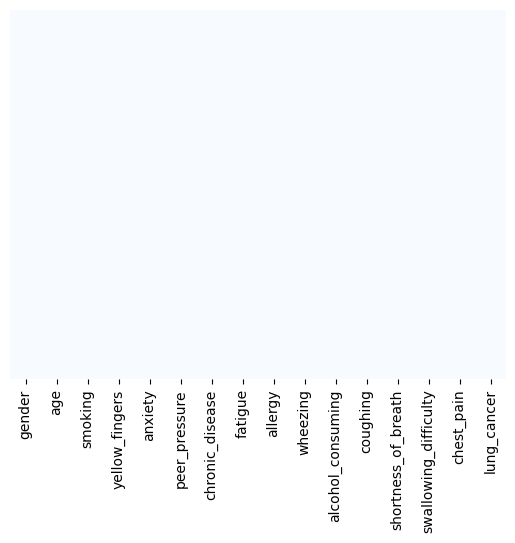

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(lung_cancer_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

<Axes: >

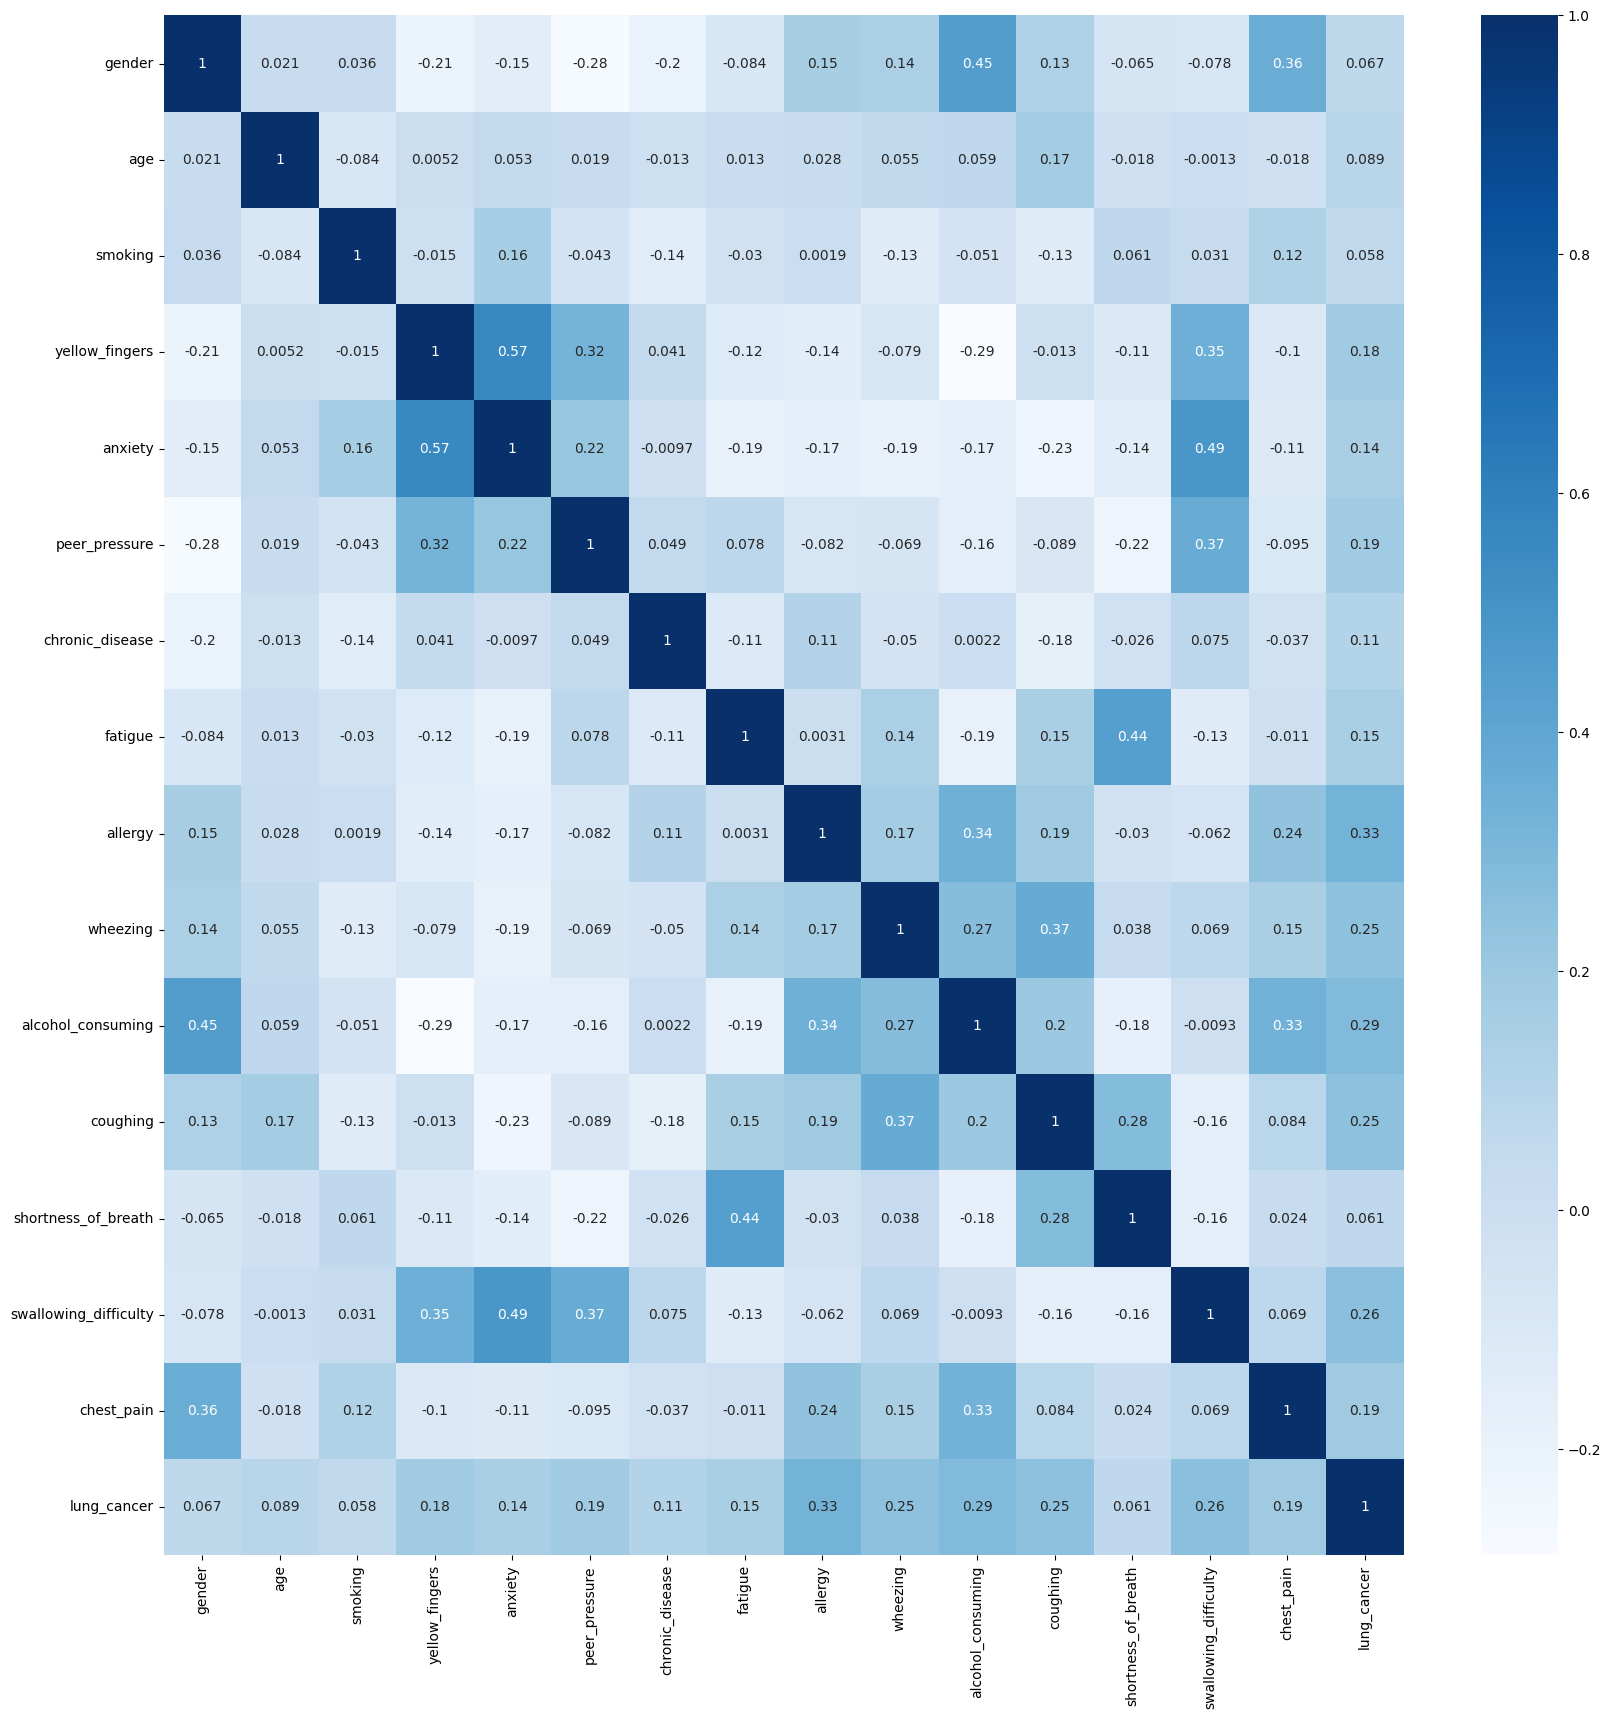

In [43]:
correlations = lung_cancer_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax)

### Model Creation

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
X = lung_cancer_df.drop('lung_cancer',axis=1)
y = lung_cancer_df['lung_cancer']

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = tf.keras.models.Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

c:\Users\OEM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6555 - loss: 0.5913 - val_accuracy: 0.9149 - val_loss: 0.4016
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.4711 - val_accuracy: 0.9149 - val_loss: 0.2897
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3266 - val_accuracy: 0.9149 - val_loss: 0.2377
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.3746 - val_accuracy: 0.9149 - val_loss: 0.2214
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.3819 - val_accuracy: 0.9149 - val_loss: 0.2163
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 0.3837 - val_accuracy: 0.9149 - val_loss: 0.2131
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.3307 - val_accuracy: 0.9149 - val_loss: 0.2134
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8809 - loss: 0.2636 - val_accuracy: 0.9149 - val_loss: 0.2142

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9029 - loss: 0.1723
Test Accuracy: 0.9231


In [51]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


<Axes: >

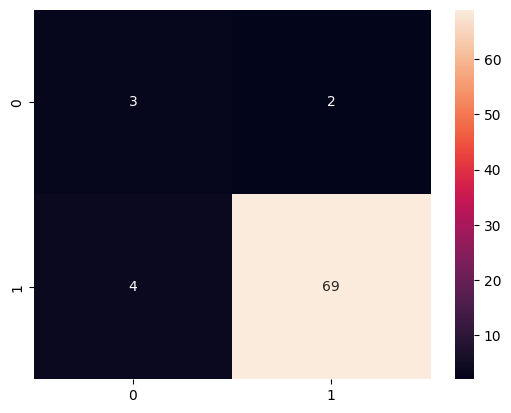

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.97      0.95      0.96        73

    accuracy                           0.92        78
   macro avg       0.70      0.77      0.73        78
weighted avg       0.94      0.92      0.93        78



In [55]:
model.save('predict_lung_cancer_model.keras')
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']